In [1]:
import pandas as pd
import numpy as np

In [2]:
diabetes = pd.read_csv('./data/Diabetes/diabetes.csv')

# Visualizing Data

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'Done'

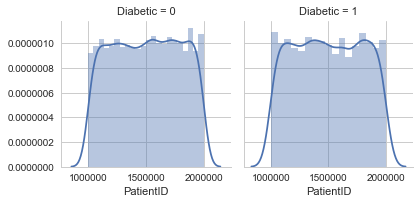

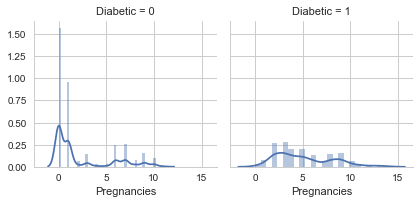

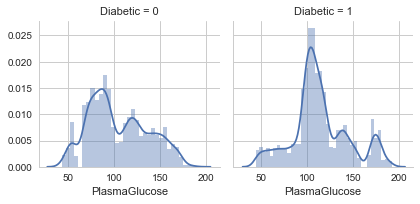

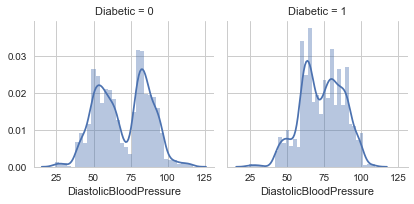

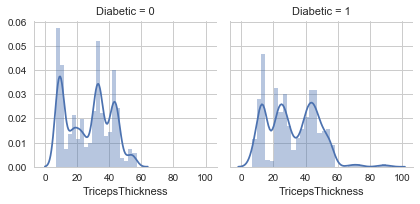

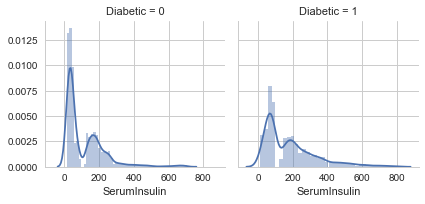

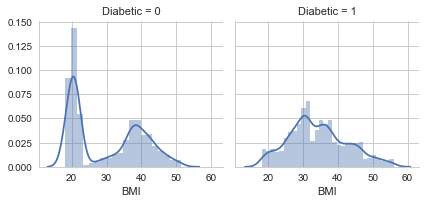

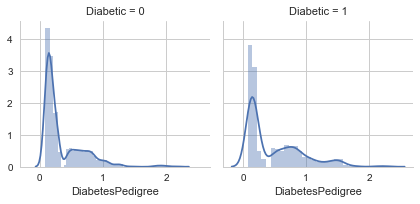

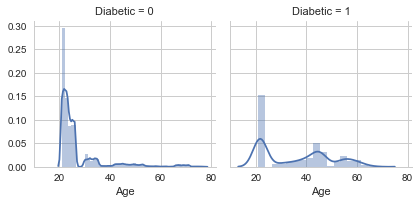

In [3]:
# Create Faceted Histograms
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

def create_facethists(df):
    import numpy as np
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]
           and df[col].name != "Diabetic"): 
            g = sns.FacetGrid(df, col="Diabetic")
            g.map(sns.distplot, col)       
    return('Done') 

create_facethists(diabetes)

'Done'

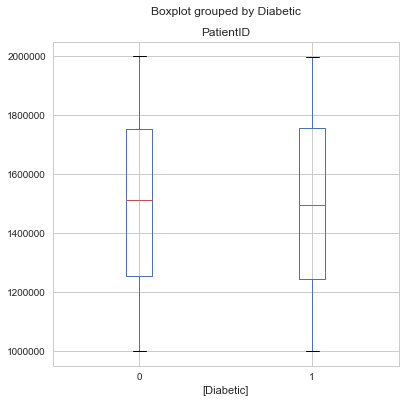

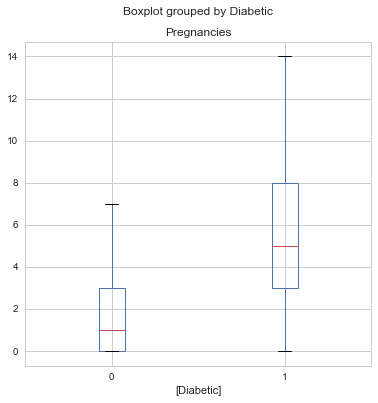

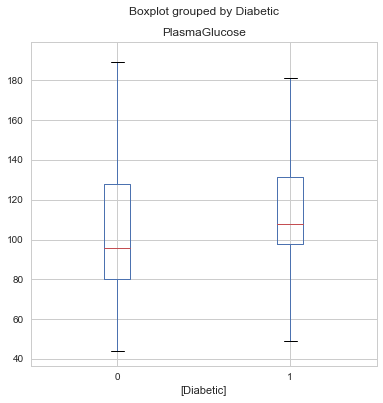

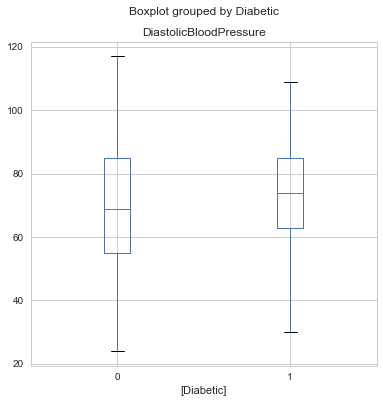

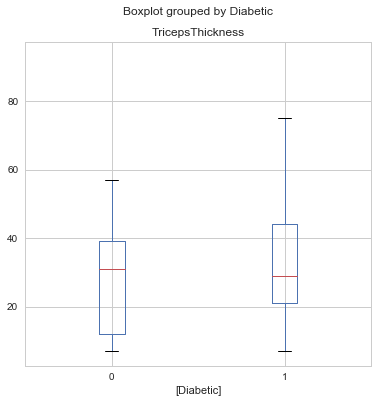

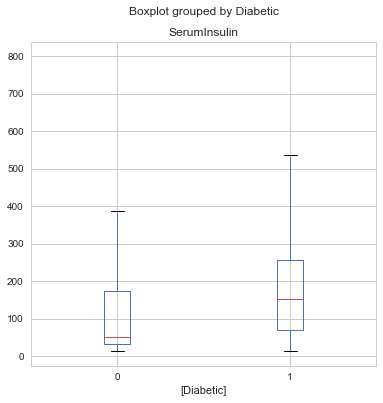

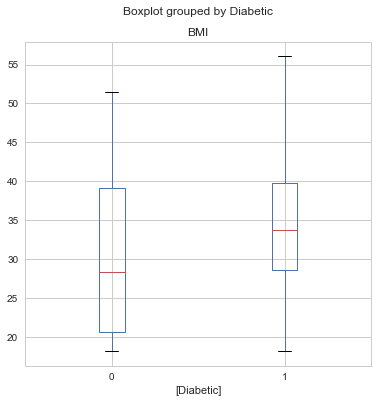

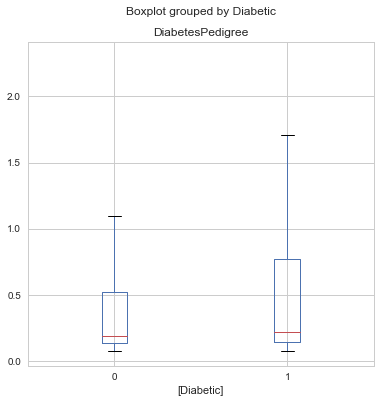

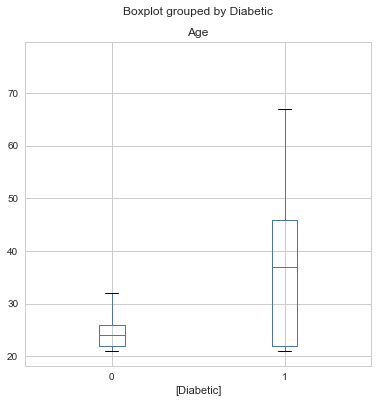

In [4]:
# Create Boxplots

def create_boxplots(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64] 
           and df[col].name != "Diabetic"):                  
            fig = plt.figure(figsize = (6,6))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['Diabetic'])          
    return('Done') 

create_boxplots(diabetes)

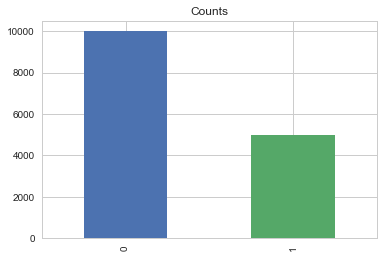

In [5]:
count = diabetes.Diabetic.value_counts()
count.plot(kind='bar', title='Counts')

In [6]:
diabetes.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
Physician                  object
dtype: object

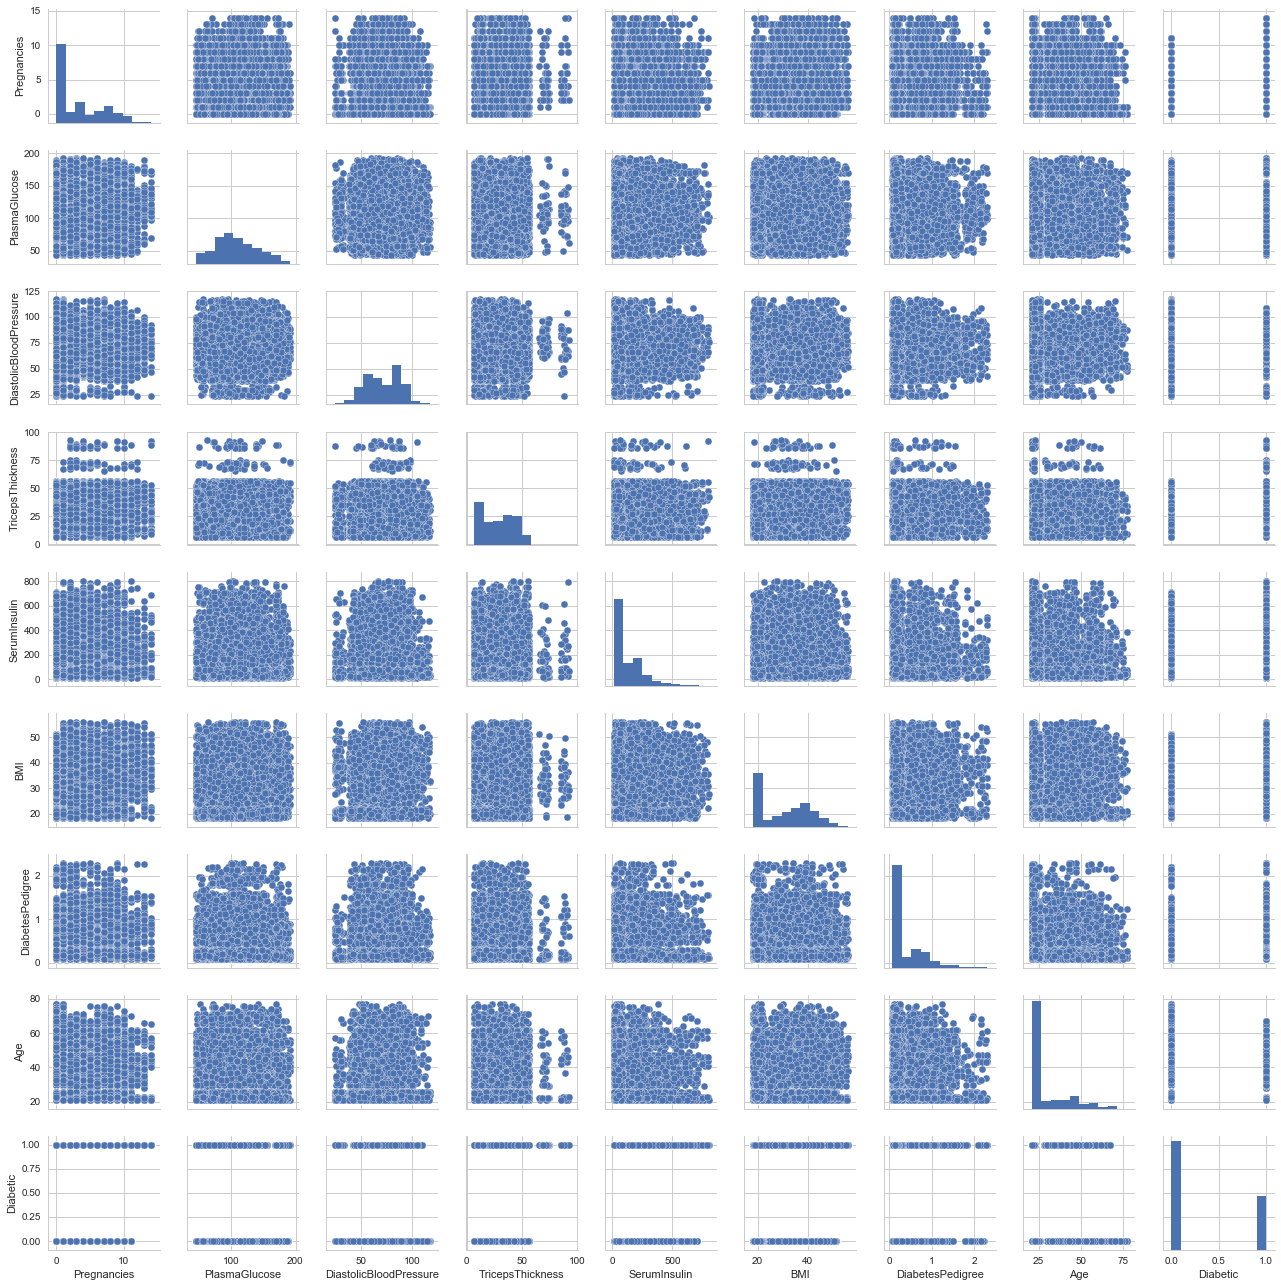

In [7]:
# Create a scatter plot matrix
%matplotlib inline

import seaborn as sns
num_cols = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age','Diabetic'] 
sns.pairplot(diabetes[num_cols], size=2)

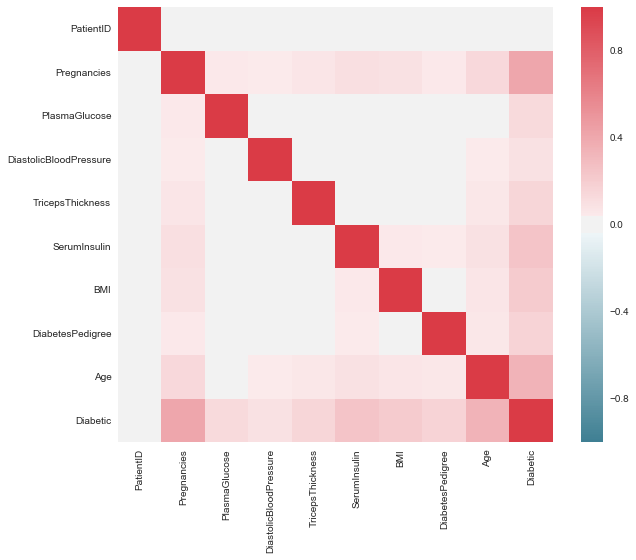

In [8]:
import seaborn as sns
from matplotlib import pyplot as pl

f, ax = pl.subplots(figsize=(10, 8))
corr = diabetes.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [9]:
from scipy import stats
from scipy.stats import zscore

diabetes_new = diabetes.copy()
diabetes_new.loc[:,['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']] = diabetes.loc[:,['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']].apply(zscore)

In [10]:
diabetes_new.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,1.974401,0.523884,0.356298,-0.863136,1.229683,1.213191,21,0,Dan Drayton
1,1147438,8,-0.495823,1.299626,1.249448,-0.765438,-1.052302,0.158365,23,0,Anthony Frizzell
2,1640031,7,0.223356,-1.445306,1.592967,-0.772953,1.024922,0.079019,23,0,Gordon Fredrickson
3,1883350,9,-0.151868,0.404539,-0.262036,1.248633,-0.197512,1.282870,43,1,Chad Corbitt
4,1424119,1,-0.714703,-0.729237,-0.124629,-0.772953,1.136926,0.549542,22,0,Zachary Fellows


In [11]:
diabetes_new['ln_Age'] = np.log(diabetes_new['Age'])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

diabetes_new.loc[:,['Pregnancies','DiabetesPedigree','Age','ln_Age']] = scaler.fit_transform(diabetes_new.loc[:,['Pregnancies','DiabetesPedigree','Age','ln_Age']])

In [13]:
diabetes_new.head()    

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician,ln_Age
0,1354778,0.000000,1.974401,0.523884,0.356298,-0.863136,1.229683,0.510511,0.000000,0,Dan Drayton,0.000000
1,1147438,0.571429,-0.495823,1.299626,1.249448,-0.765438,-1.052302,0.036123,0.035714,0,Anthony Frizzell,0.070017
2,1640031,0.500000,0.223356,-1.445306,1.592967,-0.772953,1.024922,0.000438,0.035714,0,Gordon Fredrickson,0.070017
3,1883350,0.642857,-0.151868,0.404539,-0.262036,1.248633,-0.197512,0.541848,0.392857,1,Chad Corbitt,0.551595
4,1424119,0.071429,-0.714703,-0.729237,-0.124629,-0.772953,1.136926,0.212047,0.017857,0,Zachary Fellows,0.035804


In [14]:
# Predicting the Test set results
def predict_test(classifier, test_data):
    return classifier.predict(x_test)

In [15]:
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
def calculate_confusion_matrix(y_test,y_pred):
    return(confusion_matrix(y_test,y_pred))

In [16]:
#Calculate model accuracy
from sklearn import metrics

def calculate_accuracy(classifier,y_test,x_test):
    return (metrics.accuracy_score(y_test,classifier.predict(x_test)))

In [17]:
from sklearn.metrics import classification_report, confusion_matrix  
def calculate_classification_report(y_test, y_pred):
    return(classification_report(y_test, y_pred))  


In [18]:
#Split the data into Training and Testing set
from sklearn import model_selection

def split_data(x,y):
    x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
    return x_train,x_test,y_train,y_test

# Diabetes Prediction

## Data Slicing

In [19]:
x = diabetes_new.loc[:,['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age','ln_Age']].values
y= diabetes_new.iloc[:,-3].values

In [20]:
x_train,x_test,y_train,y_test = split_data(x,y)

## Logistic Regression

In [21]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred_logreg = predict_test(Logistic_Regression,x_test)

In [23]:
calculate_confusion_matrix(y_test,y_pred_logreg)

array([[2641,  345],
       [ 594,  920]])

In [24]:
calculate_accuracy(Logistic_Regression,y_test,x_test)

0.7913333333333333

In [25]:
print(calculate_classification_report(y_test,y_pred_logreg))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85      2986
          1       0.73      0.61      0.66      1514

avg / total       0.79      0.79      0.79      4500



## Decision Tree Training

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [27]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [28]:
y_pred_dt =predict_test(dt,x_test)

In [29]:
calculate_accuracy(dt,y_test,x_test)

0.9062222222222223

In [30]:
print(calculate_classification_report(y_test,y_pred_dt))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93      2986
          1       0.88      0.84      0.86      1514

avg / total       0.91      0.91      0.91      4500



## ROC

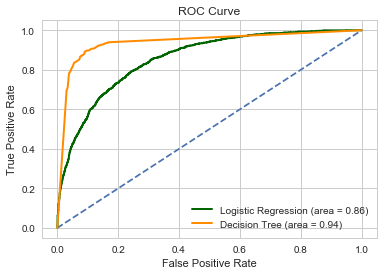

In [31]:
%matplotlib inline 
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot
from sklearn.metrics import roc_curve,roc_auc_score

lr_pred_prob = Logistic_Regression.predict_proba(x_test)[:,1]
lr_tpr,lr_fpr,_ = roc_curve(y_test,lr_pred_prob)
roc_auc_lr = roc_auc_score(y_test, lr_pred_prob)

dt_pred_prob = dt.predict_proba(x_test)[:,1]
dt_tpr,dt_fpr,_ = roc_curve(y_test,dt_pred_prob)
roc_auc_dt = roc_auc_score(y_test, dt_pred_prob)

#plot(x,y)
pyplot.plot([0, 1], [0, 1], linestyle='--')
#logistic regression
pyplot.plot(lr_tpr,lr_fpr, color='darkgreen',lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
#decision tree
pyplot.plot(dt_tpr,dt_fpr, color='darkorange',lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()



# Blood Insulin prediction

In [32]:
x = diabetes.loc[:,['Age','BMI','Pregnancies','SerumInsulin']].values
y= diabetes.iloc[:,-5].values

In [33]:
x_train,x_test,y_train,y_test = split_data(x,y)

In [34]:
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression_model =Linear_Regression.fit(x_train,y_train)

/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [35]:
y_pred_lr =predict_test(Linear_Regression,x_test)

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lr)  

3.0355367632904535e-28

In [37]:
Linear_Regression_model.score(x_test,y_pred_lr)

1.0

In [38]:
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0,Pedro Fielder
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0,Lonnie Schindler
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0,Erik Collado
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1,Wade Munger
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0,Billie Stonge


In [39]:
y_pred_lr[50]

30.74847251999998

In [40]:
y_test[50]

30.74847252

In [41]:
 diabetes.iloc[:,-5].values

array([43.50972593, 21.24057571, 41.51152348, ..., 18.69068305,
       19.7916451 , 36.21543653])

In [42]:
(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})  ).head()

,Actual,Predicted
0,37.061484,37.061484
1,20.169893,20.169893
2,29.598699,29.598699
3,35.633537,35.633537
4,46.683840,46.683840


# Evaluation

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lr)

1.0

In [44]:
n =[172,174,176,172,172,173,176,172,177,174,176,175,176,169,175,174,174,174,175,173,171,171,175,175,173,175,175]

(array([1., 0., 2., 4., 0., 3., 5., 7., 4., 1.]),
 array([169. , 169.8, 170.6, 171.4, 172.2, 173. , 173.8, 174.6, 175.4,
        176.2, 177. ]),
 <a list of 10 Patch objects>)

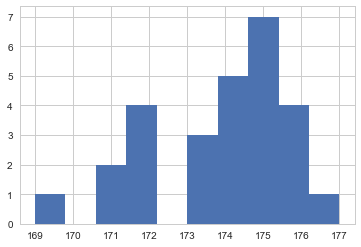

In [45]:
import matplotlib.pyplot as plt
plt.hist(n)